In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
df = pd.read_csv("Housing.csv")
print("First 5 rows:\n", df.head(), "\n")
print("Data shape:", df.shape)

First 5 rows:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished   

Data shape: (545, 13)


In [10]:
print("Columns:", df.columns.tolist())

Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


In [11]:
target_col = "price"
df = df.dropna(subset=[target_col])
df[df.select_dtypes("number").columns] = df.select_dtypes("number").fillna(
    df.median(numeric_only=True)
)

In [12]:
simple_feature = "area"
X_simple = df[[simple_feature]]
y = df[target_col]

Xs_train, Xs_test, ys_train, ys_test = train_test_split(
    X_simple, y, test_size=0.20, random_state=42
)

In [13]:
features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
X_multi = df[features]

Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    X_multi, y, test_size=0.20, random_state=42
)

In [14]:
lr_simple = LinearRegression().fit(Xs_train, ys_train)
lr_multi  = LinearRegression().fit(Xm_train, ym_train)

In [15]:
def report(model, X_test, y_test, label):
    pred = model.predict(X_test)
    print(f"\n=== {label} ===")
    print(f" MAE : {mean_absolute_error(y_test, pred):,.2f}")
    print(f" MSE : {mean_squared_error(y_test, pred):,.2f}")
    print(f" R²  : {r2_score(y_test, pred):.3f}")
    return pred

pred_simple = report(lr_simple, Xs_test, ys_test, "Simple Linear Regression")
pred_multi  = report(lr_multi,  Xm_test, ym_test, "Multiple Linear Regression")


=== Simple Linear Regression ===
 MAE : 1,474,748.13
 MSE : 3,675,286,604,768.19
 R²  : 0.273

=== Multiple Linear Regression ===
 MAE : 1,127,483.35
 MSE : 2,292,721,545,725.36
 R²  : 0.546


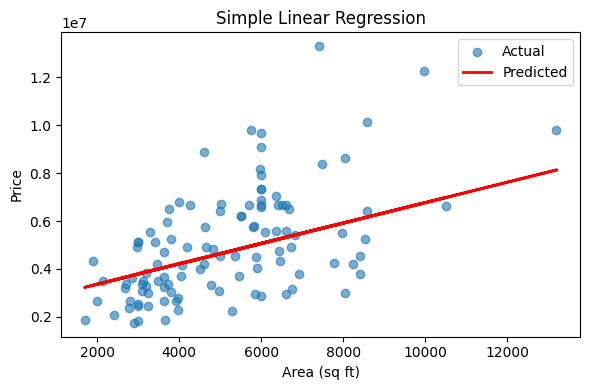

In [16]:
plt.figure(figsize=(6,4))
plt.scatter(Xs_test, ys_test, alpha=0.6, label="Actual")
plt.plot(Xs_test, pred_simple, color="red", linewidth=2, label="Predicted")
plt.xlabel(f"{simple_feature.capitalize()} (sq ft)")
plt.ylabel("Price")
plt.title("Simple Linear Regression")
plt.legend(); plt.tight_layout(); plt.show()

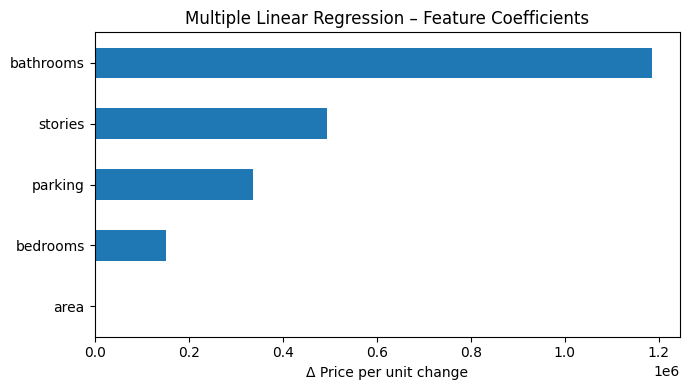

In [17]:
plt.figure(figsize=(7,4))
coef_series = pd.Series(lr_multi.coef_, index=features).sort_values()
coef_series.plot(kind="barh")
plt.title("Multiple Linear Regression – Feature Coefficients")
plt.xlabel("Δ Price per unit change")
plt.tight_layout(); plt.show()

In [18]:
print("\n🔍 Interpretation:")
print(f"  Simple model → every extra square foot adds ≈ {lr_simple.coef_[0]:,.2f} to price.")
print("  Multiple model coefficients:")
for f, c in zip(features, lr_multi.coef_):
    print(f"    {f:<10}: {c:,.2f}")
print(f"  Intercept   : {lr_multi.intercept_:,.2f}")


🔍 Interpretation:
  Simple model → every extra square foot adds ≈ 425.73 to price.
  Multiple model coefficients:
    area      : 308.87
    bedrooms  : 151,246.75
    bathrooms : 1,185,731.71
    stories   : 495,100.76
    parking   : 337,660.83
  Intercept   : 51,999.68
